# Hello Semantic Segmentation with DeepLab

In [3]:
# Prerequsites & Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101

# !pip install torch torchvision torchaudio numpy matplotlib

### Functions for Main Tasks

In [4]:
def load_deeplabv3(pretrained=True, num_classes=21):
    """
    Load pre-trained DeepLabV3 model with a ResNet-101 backbone

    Args:
        pretrained (bool): If True, use model pre-trained with COCO train2017
        num_classes (int): Number of classes for the model output, COCO has 21 classes

    Returns:
        model (torch.nn.Module): loaded DeepLabV3 model
    """
    # Load DeepLabV3 model
    model = deeplabv3_resnet101(pretrained=pretrained)

    model.eval() # Set to eval mode, disable dropout and batch normalization

    return model


def segment_image(model, image_file_path):
    """
    Perform semantic segmentation with the passed on model

    Args:
        image_file_path (str): path to the image file
        model (torch.nn.Module): semantic segmentation model to use

    Returns:
        output (torch.Tensor): semantic segmentation output
    """
    # Load image
    image = Image.open(image_file_path).convert("RGB")

    # Define the transformation to make image fit the model
    transform = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = transform(image).unsqueeze(0)

    # Run inference
    with torch.no_grad():
        output = model(input_tensor)['out'][0]

    return output

# Function to display the segmentation results
def show_segmentation(image_file_path, output):
    """
    Displays the original image alongside and semantic segmentation result

    Args:
        image_file_path (str): Path to the image file
        output (torch.Tensor): semantic segmentation output
    """
    # Load original image
    image = Image.open(image_file_path)
    
    # Convert model output to a 2D array
    output_predictions = output.argmax(0)

    # Display the original image and the segmentation map
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(output_predictions.numpy())
    plt.title('Semantic Segmentation')
    plt.colorbar()
    plt.show()

### Perform Semantic Segmentation

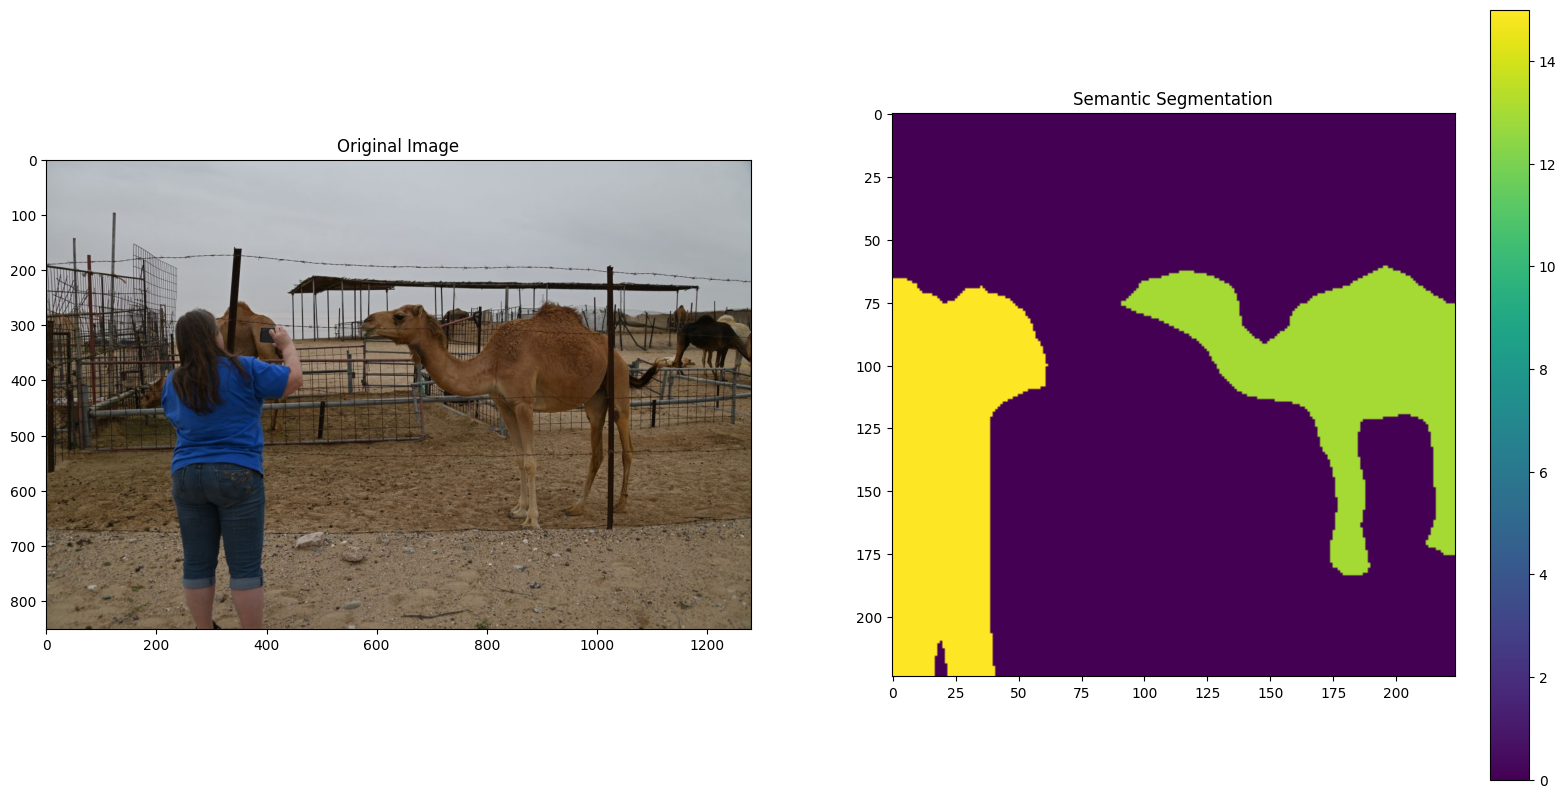

In [8]:
# Load model
model = load_deeplabv3(pretrained=True)

# Get test image
image_file_path = 'images/abu_dhabi_camel.jpg'

# Perform semantic segmentation
output = segment_image(model, image_file_path)

# Show results
show_segmentation(image_file_path, output)